## Pandas Data Frames

- Renaming - Ordering
- Applying functions, working with Numpy functions
- Concatinatng & Merging
- Dummy Variables
- Dealing with Missing values
- I/O operations

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


CSS = """
.output {
    align-items: center;
}
"""
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code mode"></form>''')

In [2]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
div.output_area {
    width: 80%;
}
"""
HTML('<style>{}</style>'.format(CSS))

In [3]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0],
    'js-score': [71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0]

}

students_df = pd.DataFrame(data=data)
students_df

,name,city,age,py-score,js-score
0,Xavier,Mexico City,41,88.0,71.0
1,Ann,Toronto,28,79.0,95.0
2,Jana,Prague,33,81.0,88.0
3,Yi,Shanghai,34,80.0,79.0
4,Robin,Manchester,38,68.0,91.0
5,Amal,Cairo,31,61.0,91.0
6,Nori,Osaka,37,84.0,80.0


## Renaming Columns 

In [18]:
students_df.columns

Index(['name', 'city', 'age', 'py-score', 'js-score', 'total',
       'py-score_category'],
      dtype='object')

In [20]:
students_df.rename(columns={'py-score':'py-grade',
                            'js-score':'js-grade'})

,name,city,age,py-grade,js-grade,total,py-score_category
0,Xavier,Mexico City,41,108.0,71.0,50,high
1,Ann,Toronto,28,99.0,95.0,50,high
2,Jana,Prague,33,101.0,88.0,50,high
3,Yi,Shanghai,34,100.0,79.0,50,high
4,Robin,Manchester,38,88.0,91.0,50,low
5,Amal,Cairo,31,81.0,91.0,50,low
6,Nori,Osaka,37,104.0,80.0,50,high


In [21]:
list(students_df.columns)

['name', 'city', 'age', 'py-score', 'js-score', 'total', 'py-score_category']

## Reordering Columns

In [23]:
column_order = ['name', 'city', 'age', 'py-score','py-score_category', 'js-score', 'total' ]
students_df = students_df[column_order]
students_df

,name,city,age,py-score,py-score_category,js-score,total
0,Xavier,Mexico City,41,108.0,high,71.0,50
1,Ann,Toronto,28,99.0,high,95.0,50
2,Jana,Prague,33,101.0,high,88.0,50
3,Yi,Shanghai,34,100.0,high,79.0,50
4,Robin,Manchester,38,88.0,low,91.0,50
5,Amal,Cairo,31,81.0,low,91.0,50
6,Nori,Osaka,37,104.0,high,80.0,50


## Binning Numerical Variables

Equal width Bin

In [37]:
score_labels=["low","Moderate","high","very high"]
bins = pd.cut(students_df['py-score'],4,labels=score_labels,retbins=True)
bins

(0    very high
 1         high
 2         high
 3         high
 4     Moderate
 5          low
 6    very high
 Name: py-score, dtype: category
 Categories (4, object): ['low' < 'Moderate' < 'high' < 'very high'],
 array([ 80.973,  87.75 ,  94.5  , 101.25 , 108.   ]))

equal frequency bin

In [38]:
bins = pd.qcut(students_df['py-score'],4, labels=score_labels)
bins

['very high', 'Moderate', 'high', 'Moderate', 'low', 'low', 'very high']
Categories (4, object): ['low' < 'Moderate' < 'high' < 'very high']

custom bins

In [42]:
score_labels=["low","Moderate","high","very high"]
bins = pd.cut(students_df['py-score'],[70,80,90,100,108], labels=score_labels,retbins=True)
bins

(0    very high
 1         high
 2    very high
 3         high
 4     Moderate
 5     Moderate
 6    very high
 Name: py-score, dtype: category
 Categories (4, object): ['low' < 'Moderate' < 'high' < 'very high'],
 array([ 70,  80,  90, 100, 108]))

### Applying functions

### Applying Arithmetic functions

In [4]:
students_df

,name,city,age,py-score,js-score
0,Xavier,Mexico City,41,88.0,71.0
1,Ann,Toronto,28,79.0,95.0
2,Jana,Prague,33,81.0,88.0
3,Yi,Shanghai,34,80.0,79.0
4,Robin,Manchester,38,68.0,91.0
5,Amal,Cairo,31,61.0,91.0
6,Nori,Osaka,37,84.0,80.0


In [5]:
## adding computed column , feature engineering 
students_df['total'] =\
0.4 * students_df['py-score'] + 0.3 * students_df['js-score']
students_df


,name,city,age,py-score,js-score,total
0,Xavier,Mexico City,41,88.0,71.0,56.5
1,Ann,Toronto,28,79.0,95.0,60.1
2,Jana,Prague,33,81.0,88.0,58.8
3,Yi,Shanghai,34,80.0,79.0,55.7
4,Robin,Manchester,38,68.0,91.0,54.5
5,Amal,Cairo,31,61.0,91.0,51.7
6,Nori,Osaka,37,84.0,80.0,57.6


In [6]:
students_df.iloc[:, 3:5]

,py-score,js-score
0,88.0,71.0
1,79.0,95.0
2,81.0,88.0
3,80.0,79.0
4,68.0,91.0
5,61.0,91.0
6,84.0,80.0


### using existing NumPy funnction instead of writing your own function

In [7]:
np.average(students_df.iloc[:, 3:5], axis=1,
                         weights=[0.4, 0.3])

array([80.71428571, 85.85714286, 84.        , 79.57142857, 77.85714286,
       73.85714286, 82.28571429])

In [8]:
students_df['total']= np.average(students_df.iloc[:, 3:5], axis=1,
                         weights=[0.4, 0.3])

### Apply function

In [9]:
students_df[["py-score","js-score"]].apply(lambda x :  x* 10)

,py-score,js-score
0,880.0,710.0
1,790.0,950.0
2,810.0,880.0
3,800.0,790.0
4,680.0,910.0
5,610.0,910.0
6,840.0,800.0


In [10]:
students_df[["py-score","js-score"]].apply(np.sqrt)

,py-score,js-score
0,9.380832,8.426150
1,8.888194,9.746794
2,9.000000,9.380832
3,8.944272,8.888194
4,8.246211,9.539392
5,7.810250,9.539392
6,9.165151,8.944272


In [11]:
students_df

,name,city,age,py-score,js-score,total
0,Xavier,Mexico City,41,88.0,71.0,80.714286
1,Ann,Toronto,28,79.0,95.0,85.857143
2,Jana,Prague,33,81.0,88.0,84.000000
3,Yi,Shanghai,34,80.0,79.0,79.571429
4,Robin,Manchester,38,68.0,91.0,77.857143
5,Amal,Cairo,31,61.0,91.0,73.857143
6,Nori,Osaka,37,84.0,80.0,82.285714


In [12]:
##del students_df['total']

#print("students_df['total'] = np.average(students_df.iloc[:, 2:5], axis=1,weights=[0.4, 0.3, 0.3])")
students_df['total'] = 50
students_df

,name,city,age,py-score,js-score,total
0,Xavier,Mexico City,41,88.0,71.0,50
1,Ann,Toronto,28,79.0,95.0,50
2,Jana,Prague,33,81.0,88.0,50
3,Yi,Shanghai,34,80.0,79.0,50
4,Robin,Manchester,38,68.0,91.0,50
5,Amal,Cairo,31,61.0,91.0,50
6,Nori,Osaka,37,84.0,80.0,50


## Map function with Lambda

In [13]:
students_df["py-score"]= list(map(lambda x:x+10,students_df["py-score"]))
students_df

,name,city,age,py-score,js-score,total
0,Xavier,Mexico City,41,98.0,71.0,50
1,Ann,Toronto,28,89.0,95.0,50
2,Jana,Prague,33,91.0,88.0,50
3,Yi,Shanghai,34,90.0,79.0,50
4,Robin,Manchester,38,78.0,91.0,50
5,Amal,Cairo,31,71.0,91.0,50
6,Nori,Osaka,37,94.0,80.0,50


In [14]:
students_df["py-score"]= students_df["py-score"].apply(lambda x: x+10)
students_df

,name,city,age,py-score,js-score,total
0,Xavier,Mexico City,41,108.0,71.0,50
1,Ann,Toronto,28,99.0,95.0,50
2,Jana,Prague,33,101.0,88.0,50
3,Yi,Shanghai,34,100.0,79.0,50
4,Robin,Manchester,38,88.0,91.0,50
5,Amal,Cairo,31,81.0,91.0,50
6,Nori,Osaka,37,104.0,80.0,50


## Using Numpy where function

In [16]:
# Use np.where to create a new column based on the values of column 'A'
students_df['py-score_category'] = np.where(students_df['py-score'] > 90, 'high', 'low')

students_df

,name,city,age,py-score,js-score,total,py-score_category
0,Xavier,Mexico City,41,108.0,71.0,50,high
1,Ann,Toronto,28,99.0,95.0,50,high
2,Jana,Prague,33,101.0,88.0,50,high
3,Yi,Shanghai,34,100.0,79.0,50,high
4,Robin,Manchester,38,88.0,91.0,50,low
5,Amal,Cairo,31,81.0,91.0,50,low
6,Nori,Osaka,37,104.0,80.0,50,high


### Concatinating
- concat mutilpe data frames on the same axis.
- pd.concat()

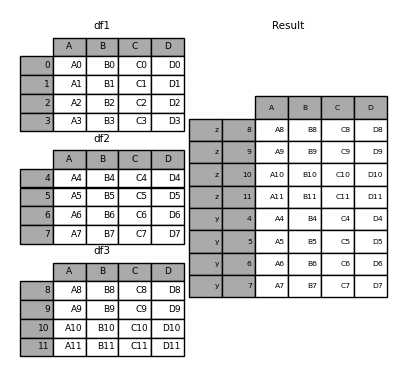

In [22]:
Image("res/merging_concat_dict_keys.png")

source:pandas.pydata.org

In [25]:
print('df = pd.DataFrame(np.random.randn(10, 4))')
df = pd.DataFrame(np.random.randn(7, 4))
print(df)
print("\npieces = [df[:2], df[2:4], df[4:]]")
pieces = [df[:2], df[2:4], df[4:]]
pieces

df = pd.DataFrame(np.random.randn(10, 4))
          0         1         2         3
0  0.514357  0.066294 -0.232913 -0.645003
1 -0.378498  0.832863  1.673958  1.023576
2  0.378184  0.317951 -3.012412  0.409474
3  0.951740  0.104808  0.691798  1.446862
4  0.023173 -0.554983 -0.066893 -0.390423
5 -1.154884  0.895441  0.354435  0.936527
6 -0.498323 -0.554938  0.971477  0.192419

pieces = [df[:2], df[2:4], df[4:]]


[          0         1         2         3
 0  0.514357  0.066294 -0.232913 -0.645003
 1 -0.378498  0.832863  1.673958  1.023576,
           0         1         2         3
 2  0.378184  0.317951 -3.012412  0.409474
 3  0.951740  0.104808  0.691798  1.446862,
           0         1         2         3
 4  0.023173 -0.554983 -0.066893 -0.390423
 5 -1.154884  0.895441  0.354435  0.936527
 6 -0.498323 -0.554938  0.971477  0.192419]

In [26]:
print("\npd.concat(pieces)")
pd.concat(pieces,ignore_index=True)


pd.concat(pieces)


,0,1,2,3
0,0.514357,0.066294,-0.232913,-0.645003
1,-0.378498,0.832863,1.673958,1.023576
2,0.378184,0.317951,-3.012412,0.409474
3,0.951740,0.104808,0.691798,1.446862
4,0.023173,-0.554983,-0.066893,-0.390423
5,-1.154884,0.895441,0.354435,0.936527
6,-0.498323,-0.554938,0.971477,0.192419


## Encoding - Dummy variables
- dummy variables are binary variables that represents the values that categorical variables hold. 
- It is effecient representation for programming, preprocessing, analysing and ML tasks purposes.

#### Here is an example...

In [34]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [35]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [36]:
df.apply(np.unique)

A       [a, b]
B    [a, b, c]
C    [1, 2, 3]
dtype: object

### Working with Missing Data

### np.nan is used to represent missing values

In [27]:
print("df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})")
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
df_

df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})


,x
0,1.0
1,2.0
2,NaN
3,4.0


In [28]:
df_["y"]=[2,np.nan,4,5]
df_

,x,y
0,1.0,2.0
1,2.0,NaN
2,NaN,4.0
3,4.0,5.0


### Dropping rows that contains missing values 

In [29]:
#print("df_.dropna()")
df_.dropna()


,x,y
0,1.0,2.0
3,4.0,5.0


### and you can fill the missing values with fillna..

<b>  filling nas with mean

In [30]:
df_.mean()

x    2.333333
y    3.666667
dtype: float64

In [31]:
df_[["x"]].fillna(value=df_.x.mean())

,x
0,1.000000
1,2.000000
2,2.333333
3,4.000000


In [32]:
df_

,x,y
0,1.0,2.0
1,2.0,NaN
2,NaN,4.0
3,4.0,5.0


In [33]:
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
print('df_.fillna(value=0)\n',df_.fillna(value=0))
print("\ndf_.fillna(method=ffill)\n",df_.fillna(method='ffill'))
print("\ndf_.fillna(method=bfill)\n",df_.fillna(method='bfill'))

df_.fillna(value=0)
      x
0  1.0
1  2.0
2  0.0
3  4.0

df_.fillna(method=ffill)
      x
0  1.0
1  2.0
2  2.0
3  4.0

df_.fillna(method=bfill)
      x
0  1.0
1  2.0
2  4.0
3  4.0


### I/O operations
- reading data directly from csv, text, Excel files, DFS
- Pandas Data Frames are not peristent storage!
- writing data directly to file storage.

In [37]:
students_df.to_csv("students_df.csv",index=False)

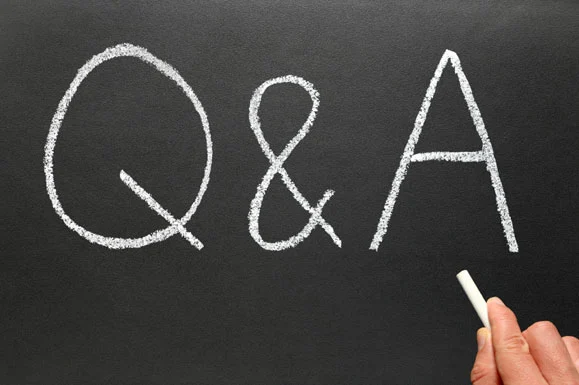

In [38]:
Image("res/Q&A.png")